##### 1. 
Consider the USArrests data set on BlackBoard. For each of the 50 states in The
United States, the data set contains the number of arrests per 100,000 residents for each of three
crimes: Assault, Murder and Rape. Also recorded is UrbanPop, the percent of the population in
each state living in urban areas. Perform PCA on standardized data and explore the data. What
patterns do you recognize? What is meaning of the first two principal components? Describe the
relation between UrbanPop and the other three variables. In which cities would you like to live
and in which not (according to this data set) and explain why based on the results of the PCA?
Illustrate your findings with the necessary plots (scree plot, biplots, etc.)

In [53]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

In [54]:
col_names = ['State','Murder', 'Assault', 'UrbanPop', 'Rape']
data = pd.read_csv('USArrests.csv', header = 0,names = col_names)

In [55]:
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [94]:
n = len(data.columns)
feature_cols = ['Murder', 'Assault', 'UrbanPop', 'Rape']
x = data[feature_cols]
y = data.State

### Standardize data

In [95]:
standard_scaler = StandardScaler()
x_scaled_df = pd.DataFrame(standard_scaler.fit_transform(x), columns = feature_cols)
x_s = standard_scaler.fit_transform(x)

In [96]:
x_scaled_df.head(5)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Do some exploratory analysis of dataset with pairplots and correlation

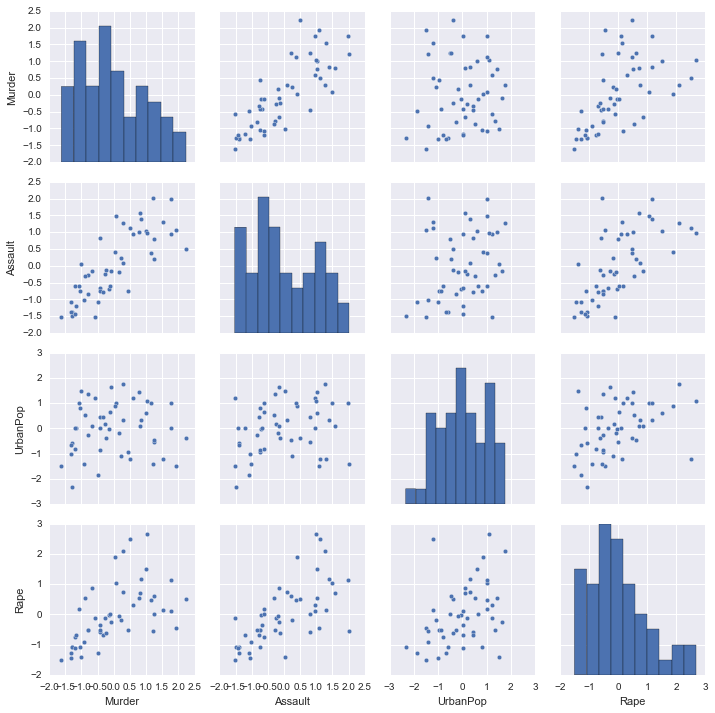

In [97]:
sns.pairplot(x_scaled_df);

## Perform PCA

In [98]:
pca = decomposition.PCA(n_components=4)
pca.fit(x_scaled_df)
x_pca_components = pca.components_

In [99]:
var = pca.explained_variance_ratio_ #The amount of variance that each PC explains

In [100]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

### Scree Plot

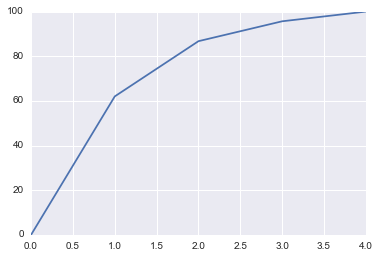

In [101]:
plt.plot(np.array([0] + list(var1)));

In [91]:
x_pca_components

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [104]:
xvector = pca.components_[0] 
yvector = pca.components_[1]
xs = pca.transform(x_scaled_df)[:,0] 
ys = pca.transform(x_scaled_df)[:,1]

### Biplot

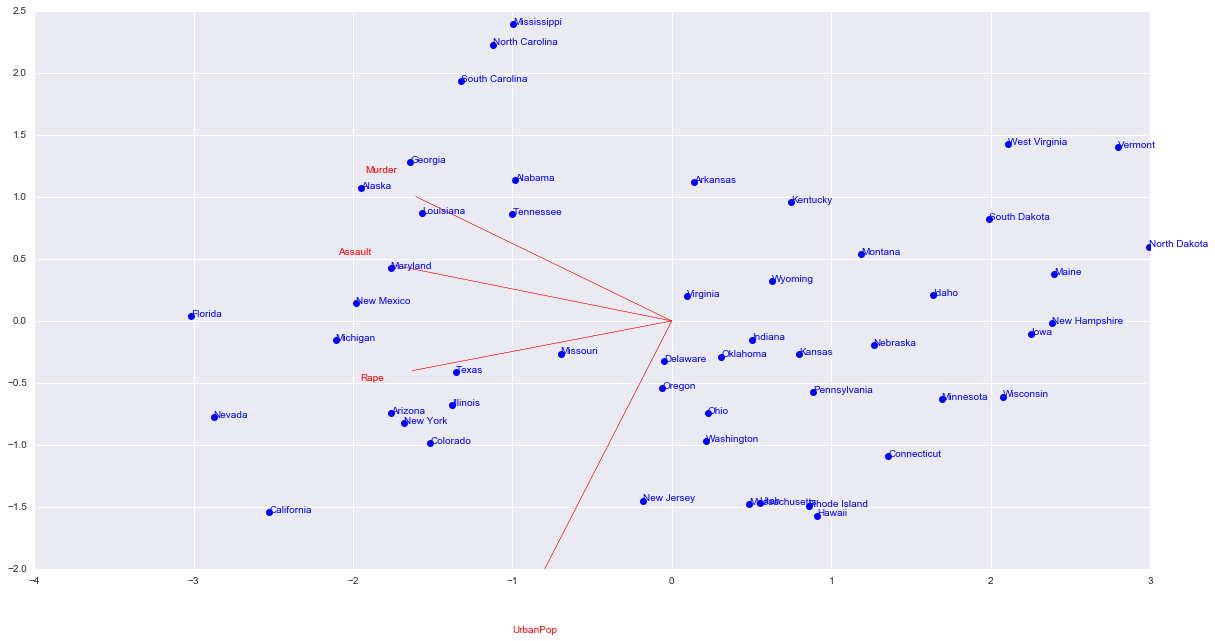

In [115]:
plt.figure(figsize=(20,10))
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(x_scaled_df.columns.values)[i], color='r')
    
for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1, ys[i]*1, data.State[i], color='b')

##### What patterns do you recognize? What is meaning of the first two principal components? 

It seems from the biplot that generally states that are considered rural have lower incidents of Murder, Rape, and Assault. For example, North Dakota, Iowa, South Dakota, Vermont, New Hampshire are all on the far right edge of the chart and therefore have smaller populations and indcidents of crime. On the other end of the spectrum, it seems states with more large urban centers have higher incidents of crime, e.g. California, Florida, New York, Texas. This is not a complete causal relationship between UrbanPop and crime though as southern states like Georgia, Louisiana, Alabama, Mississippi, North and South Carolina, and Tennesee all have very high murder rates but low low urban populations which was surprising as well.

Murder, Assault, and Rape are all pointing in a similar direction while UrbanPop is pointing more vertical. The projection of rape, murder, and assault is higher on the principal component one axis than two. The projection of urban population is higher on the principal component two axis. We know from looking at the biplot then that principal component one represents violent crime and principal component two represents urban population. 

##### Describe the relation between UrbanPop and the other three variables. 

While higher UrbanPop can be somewhat associated with a state having more violent crime, it doesn't appear to have as large of an association as I originally thought on incidents of rape, murder, or assault. Massachusetts, Ohio, and Pennsylvania all have large populations but much lower crime than other equally populous states like Colorado, New York, or Arizona. Georgia, Louisiana, Alabama, Mississippi, North and South Carolina, and Tennesee all have very high murder rates but low low urban populations. It seems that if there is a lot of one type of crime, this will signify more crime in general. For example, if there are a lot of assaults in a city then there will probably be more rapes or murders. This makes sense being PC one was violent crime.

##### In which cities would you like to live and in which not (according to this data set) and explain why based on the results of the PCA? 

From looking at the biplot, I am happy to currently live in the midwest and in a rural state like Iowa because there is very little crime of any sort.  I would not want to live in California, Florida, Lousiana because those states have very high rates of murder, assault, and rape. However, living in a city will be more important to me after I graduate and want more exciting activities to entertain me. I think living around the origin of the plot would then be a nice compromise. States like Virginia, Delaware, and Oregon all have average UrbanPop and violent crimes.